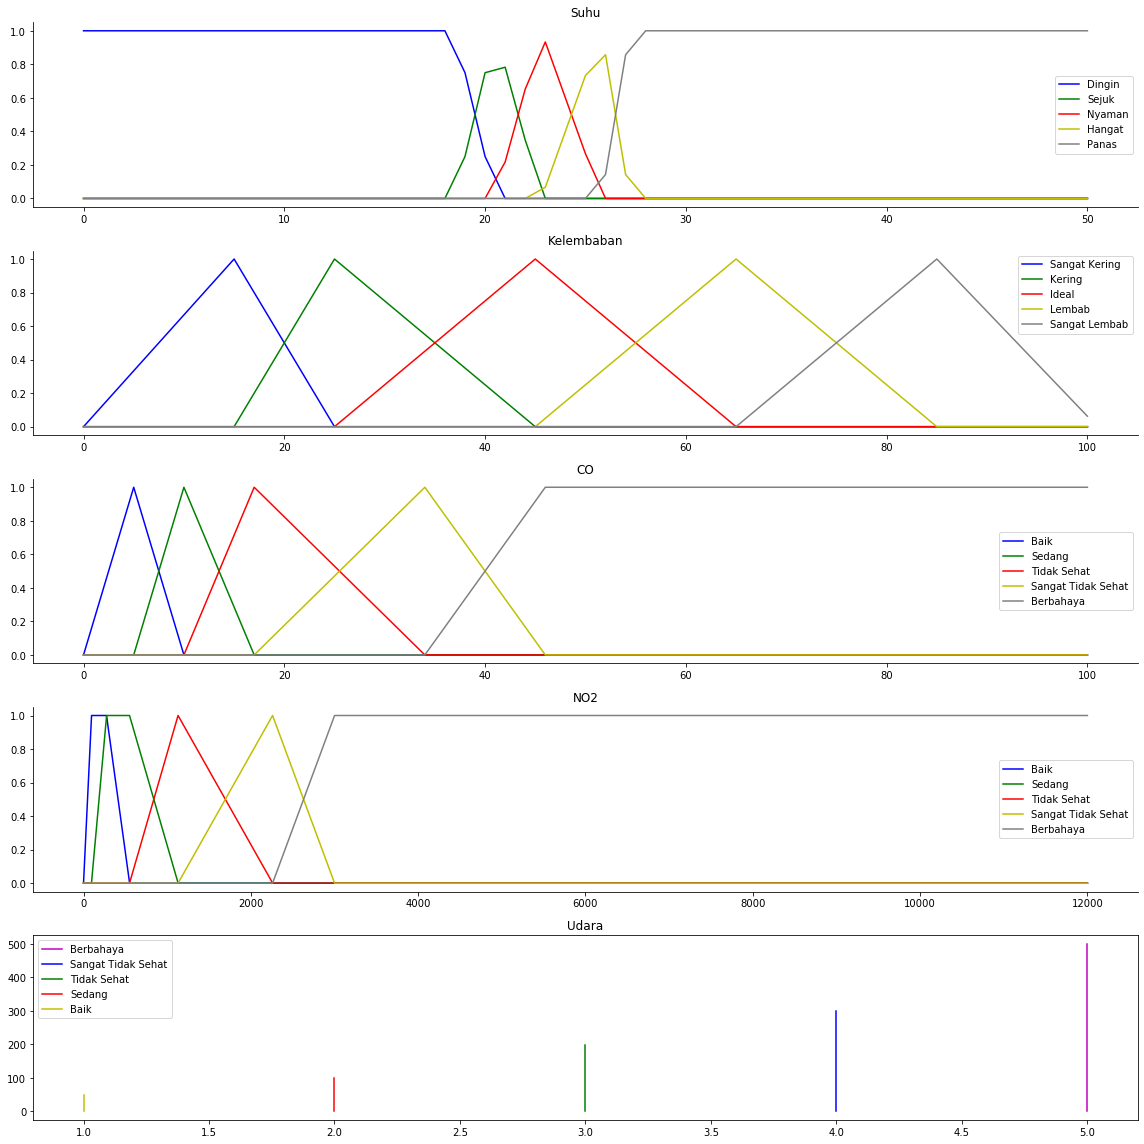

In [24]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
%matplotlib inline

# Generate universe variables
suhu = np.arange(0, 51, 1)
kelembaban = np.arange(0, 101, 1)
CO = np.arange(0, 101, 1)
NO2 = np.arange(0, 12001, 1)

# Generate fuzzy membership functions
dingin = fuzz.trapmf(suhu, [0, 0, 18.5, 20.5])
sejuk  = fuzz.trimf(suhu, [18.5, 20.5, 22.8])
nyaman  = fuzz.trimf(suhu, [20.5, 22.8, 25.8])
hangat  = fuzz.trimf(suhu, [22.8, 25.8, 27.2])
panas = fuzz.trapmf(suhu, [25.8, 27.2, 51, 51])

sangat_kering = fuzz.trimf(kelembaban, [0, 15, 25])
kering = fuzz.trimf(kelembaban, [15, 25, 45])
ideal  = fuzz.trimf(kelembaban, [25, 45, 65])
lembab  = fuzz.trimf(kelembaban, [45, 65, 85])
sangat_lembab = fuzz.trimf(kelembaban, [65, 85, 101])

baik = fuzz.trimf(CO, [0, 5, 10])
sedang  = fuzz.trimf(CO, [5, 10, 17])
tidak_sehat  = fuzz.trimf(CO, [10, 17, 34])
sangat_tidak_sehat = fuzz.trimf(CO, [17, 34, 46])
berbahaya = fuzz.trapmf(CO, [34, 46, 101, 101])

baik_x = fuzz.trapmf(NO2, [0, 95, 275, 550])
sedang_x  = fuzz.trapmf(NO2, [95, 275, 550, 1130])
tidak_sehat_x  = fuzz.trimf(NO2, [550, 1130, 2260])
sangat_tidak_sehat_x  = fuzz.trimf(NO2, [1130, 2260, 3000])
berbahaya_x = fuzz.trapmf(NO2, [2260, 3000, 12001, 12001])

BA  = 50
SE   = 100
TS  = 199
STS  = 299 
BE = 500
# Visualize these universes and membership functions
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=5, figsize=(16, 16))

ax0.plot(suhu, dingin, 'b', linewidth=1.5, label='Dingin')
ax0.plot(suhu, sejuk, 'g', linewidth=1.5, label='Sejuk')
ax0.plot(suhu, nyaman, 'r', linewidth=1.5, label='Nyaman')
ax0.plot(suhu, hangat, 'y', linewidth=1.5, label='Hangat')
ax0.plot(suhu, panas, 'grey', linewidth=1.5, label='Panas')

ax0.set_title('Suhu')
ax0.legend()

ax1.plot(kelembaban, sangat_kering, 'b', linewidth=1.5, label='Sangat Kering')
ax1.plot(kelembaban, kering, 'g', linewidth=1.5, label='Kering')
ax1.plot(kelembaban, ideal, 'r', linewidth=1.5, label='Ideal')
ax1.plot(kelembaban, lembab, 'y', linewidth=1.5, label='Lembab')
ax1.plot(kelembaban, sangat_lembab, 'grey', linewidth=1.5, label='Sangat Lembab')
ax1.set_title('Kelembaban')
ax1.legend()

ax2.plot(CO, baik, 'b', linewidth=1.5, label='Baik')
ax2.plot(CO, sedang, 'g', linewidth=1.5, label='Sedang')
ax2.plot(CO, tidak_sehat, 'r', linewidth=1.5, label='Tidak Sehat')
ax2.plot(CO, sangat_tidak_sehat, 'y', linewidth=1.5, label='Sangat Tidak Sehat')
ax2.plot(CO, berbahaya, 'grey', linewidth=1.5, label='Berbahaya')

ax2.set_title('CO')
ax2.legend()

ax3.plot(NO2, baik_x, 'b', linewidth=1.5, label='Baik')
ax3.plot(NO2, sedang_x, 'g', linewidth=1.5, label='Sedang')
ax3.plot(NO2, tidak_sehat_x, 'r', linewidth=1.5, label='Tidak Sehat')
ax3.plot(NO2, sangat_tidak_sehat_x, 'y', linewidth=1.5, label='Sangat Tidak Sehat')
ax3.plot(NO2, berbahaya_x, 'grey', linewidth=1.5, label='Berbahaya')

ax3.set_title('NO2')
ax3.legend()

ax4.plot([5, 5], [0, BE], 'm', linewidth=1.5, label='Berbahaya')
ax4.plot([4, 4], [0, STS], 'b', linewidth=1.5, label='Sangat Tidak Sehat')
ax4.plot([3, 3], [0, TS], 'g', linewidth=1.5, label='Tidak Sehat')
ax4.plot([2, 2], [0, SE], 'r', linewidth=1.5, label='Sedang')
ax4.plot([1, 1], [0, BA], 'y', linewidth=1.5, label='Baik')

ax4.set_title('Udara')
ax4.legend()
# Turn off top/right axes
for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()


In [25]:
BA  = 50; SE   = 100; TS  = 199; STS  = 299; BE = 500
FAM = [[BA,SE,TS,STS,BE], [SE,SE,TS,STS,BE], [TS,TS,TS,STS,BE], [STS,STS,STS,STS,BE], [BE,BE,BE,BE,BE]]

suhu_wilayah = float(input("Nilai suhu: "))
kelembaban_wilayah = float(input("Nilai kelembaban: "))
CO_wilayah = float(input("Kadar CO: "))
NO2_wilayah = float(input("Kadar NO2: "))

in_1 = []
in_1.append(fuzz.interp_membership(suhu, dingin, suhu_wilayah))
in_1.append(fuzz.interp_membership(suhu, sejuk, suhu_wilayah))
in_1.append(fuzz.interp_membership(suhu, nyaman, suhu_wilayah))
in_1.append(fuzz.interp_membership(suhu, hangat, suhu_wilayah))
in_1.append(fuzz.interp_membership(suhu, panas, suhu_wilayah))

in_2 = []
in_2.append(fuzz.interp_membership(kelembaban, sangat_kering, kelembaban_wilayah))
in_2.append(fuzz.interp_membership(kelembaban, kering, kelembaban_wilayah))
in_2.append(fuzz.interp_membership(kelembaban, ideal, kelembaban_wilayah))
in_2.append(fuzz.interp_membership(kelembaban, lembab, kelembaban_wilayah))
in_2.append(fuzz.interp_membership(kelembaban, sangat_lembab, kelembaban_wilayah))

in_3 = []
in_3.append(fuzz.interp_membership(CO, baik, CO_wilayah))
in_3.append(fuzz.interp_membership(CO, sedang, CO_wilayah))
in_3.append(fuzz.interp_membership(CO, tidak_sehat, CO_wilayah))
in_3.append(fuzz.interp_membership(CO, sangat_tidak_sehat, CO_wilayah))
in_3.append(fuzz.interp_membership(CO, berbahaya, CO_wilayah))

in_4 = []
in_4.append(fuzz.interp_membership(NO2, baik_x, NO2_wilayah))
in_4.append(fuzz.interp_membership(NO2, sedang_x, NO2_wilayah))
in_4.append(fuzz.interp_membership(NO2, tidak_sehat_x, NO2_wilayah))
in_4.append(fuzz.interp_membership(NO2, sangat_tidak_sehat_x, NO2_wilayah))
in_4.append(fuzz.interp_membership(NO2, berbahaya_x, NO2_wilayah))


print("Derajat Keanggotaan Suhu:")
if in_1[0]>0 :
    print("dingin :"+ str(in_1[0]))
if in_1[1]>0 :
    print("sejuk :"+ str(in_1[1]))
if in_1[2]>0 :
    print("nyaman :"+ str(in_1[2]))
if in_1[3]>0 :
    print("hangat :"+ str(in_1[3]))
if in_1[4]>0 :
    print("panas :"+ str(in_1[4]))

print("")
print("Derajat Keanggotaan Kelembaban:")
if in_2[0]>0 :
    print("sangat kering :"+ str(in_2[0]))
if in_2[1]>0 :
    print("kering :"+ str(in_2[1]))
if in_2[2]>0 :
    print("ideal :"+ str(in_2[2]))
if in_2[3]>0 :
    print("lembab :"+ str(in_2[3]))
if in_2[4]>0 :
    print("sangat lembab :"+ str(in_2[4]))

print("")
print("Derajat Keanggotaan CO:")
if in_3[0]>0 :
    print("baik :"+ str(in_3[0]))
if in_3[1]>0 :
    print("sedang :"+ str(in_3[1]))
if in_3[2]>0 :
    print("tidak sehat :"+ str(in_3[2]))
if in_3[3]>0 :
    print("sangat tidak sehat :"+ str(in_3[3]))
if in_3[4]>0 :
    print("berbahaya :"+ str(in_3[4]))
    
print("")
print("Derajat Keanggotaan NO2:")
if in_4[0]>0 :
    print("baik :"+ str(in_4[0]))
if in_4[1]>0 :
    print("sedang :"+ str(in_4[1]))
if in_4[2]>0 :
    print("tidak sehat :"+ str(in_4[2]))
if in_4[3]>0 :
    print("sangat tidak sehat :"+ str(in_4[3]))
if in_4[4]>0 :
    print("berbahaya :"+ str(in_4[4]))    

    

Nilai suhu:  20
Nilai kelembaban:  32
Kadar CO:  12
Kadar NO2:  765


Derajat Keanggotaan Suhu:
dingin :0.25
sejuk :0.75

Derajat Keanggotaan Kelembaban:
kering :0.65
ideal :0.35

Derajat Keanggotaan CO:
sedang :0.7142857142857143
tidak sehat :0.2857142857142857

Derajat Keanggotaan NO2:
sedang :0.6293103448275862
tidak sehat :0.3706896551724138


In [26]:
print("Matriks Suhu:")
print(in_1)
print("")
print("Matriks Kelembaban:")
print(in_2)
print("")
print("Matriks CO:")
print(in_3)
print("")
print("Matriks NO2:")
print(in_4)

Matriks Suhu:
[0.25, 0.75, 0.0, 0.0, 0.0]

Matriks Kelembaban:
[0.0, 0.65, 0.35, 0.0, 0.0]

Matriks CO:
[0.0, 0.7142857142857143, 0.2857142857142857, 0.0, 0.0]

Matriks NO2:
[0.0, 0.6293103448275862, 0.3706896551724138, 0.0, 0.0]


In [28]:
rul = []
for i in range(5):
    for j in range(5):
        rule=fuzz.relation_min(in_3[i], in_4[j])
        rul.append(rule)
        #print(rule)
penyebut=np.sum(rul)
#Pembilang
rul = []
for i in range(5):
    for j in range(5):
        rule=fuzz.relation_min(in_3[i], in_4[j])
        rulxx= rule*FAM[i][j]
        rul.append(rulxx)
        #print(rulxx)
pembilang=np.sum(rul)
#print (pembilang)
#print (penyebut)
hasil = pembilang/penyebut
#print (hasil)

#logic hasil
print("ISPU :"+ str(hasil))
if hasil >= 0 and hasil <= 50.5 :
    print("Baik")
if hasil> 50.5 and hasil<= 100.5:
    print("Sedang")
if hasil> 100.5 and hasil<=199.5:
    print("Tidak Sehat")
if hasil> 199.5 and hasil<= 299.5:
    print("Sangat Tidak Sehat")
if hasil>= 299.5:
    print("Berbahaya")

ISPU :159.3534482758621
Tidak Sehat
